# Histogramas en Python

## Histogramas en Python puro (sin librerias)

In [2]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [3]:
def count_elements(seq) -> dict:
    """Función que cuenta las frecuencias de aparición de cada elemento de la secuencia
    """
    hist = {}
    for i in seq:
        hist[i] = hist.get(i,0) + 1
    return hist

In [4]:
fAbs = count_elements(x)
fAbs

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

### Usando Counter de collections:

In [5]:
from collections import Counter

In [6]:
fAbs2 = Counter(x)
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

## Haciendo un histogram textual

In [7]:
def ascii_histogram(seq) -> None:
    """Histograma de frecuencias absolutas en horizontal y con caracteres ascii"""
    fAbs = count_elements(seq)
    for k in sorted(fAbs):
        print('{0:5d} {1}'.format(k,'+'*fAbs[k]))
ascii_histogram(x)

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [10]:
import random
random.seed(2019)

In [18]:
vals=[1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

In [19]:
data = []
for k,v in zip(vals,freqs):
    data.extend([k]*v)
ascii_histogram(data)

    1 ++++++++++++++++
    2 +++++++++++++++
    3 +++++++++++++
    5 +++++++++++
    7 ++++++++++++++++++++
    8 ++++++++
    9 ++++++++
   10 ++++++++++


# Histogramas con Numpy

In [20]:
import numpy as np

In [21]:
np.random.seed(2019)

In [22]:
np.set_printoptions(precision=3)

In [23]:
x = np.random.laplace(loc=10,scale=3,size=1000)

In [24]:
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [25]:
hist,bin_edges = np.histogram(x)

In [26]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [27]:
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9], dtype=int64)

Numpy por defecto hace 10 divisiones. Internamente hace:

In [31]:
n_bins = 10
min_edge = x.min()
max_edge = x.max()
bin_edges2 = np.linspace(start=min_edge,stop=max_edge,num=n_bins+1,endpoint=True)

In [32]:
bin_edges2

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

Otro ejemplo con los datos anteriores.
Nota: No funciona max(y) y he puesto el dato a mano

In [33]:
y = (0,1,1,1,2,2,3,7,7,7,25)
bcount = np.bincount(y)

In [34]:
bcount

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [40]:
hist,_ = np.histogram(y,range=(0, 25),bins = 25+1)
hist

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

# Visualización de histograma con Matplotlib y Pandas

In [41]:
import matplotlib.pyplot as plt

In [42]:
np.random.seed(2019)
x = np.random.laplace(loc=10,scale=3,size=1000)

(0.0, 140.0)

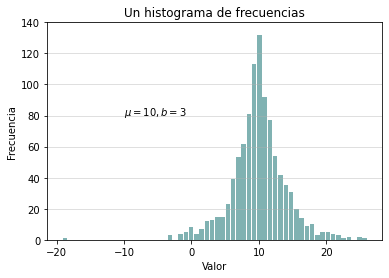

In [47]:
n,bins,patches = plt.hist(x=x,bins='auto',color='#559999',alpha=0.75,rwidth=0.85)
plt.grid(axis="y",alpha=0.5)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Un histograma de frecuencias")
plt.text(-10,80,r'$\mu = 10, b = 3$')
plt.ylim(ymax=np.ceil(n.max()/10)*10 if n.max()%10 else n.max()+10)

In [48]:
import pandas as pd

Los objetos para pintar de pandas tienen que ser un objeto Series

In [49]:
size,scale = 1000, 10
data = pd.Series(np.random.gamma(scale,size= size))

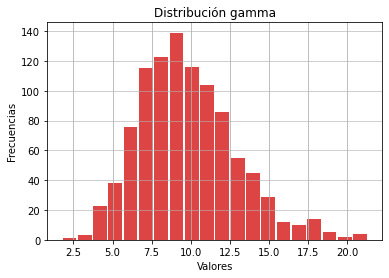

In [51]:
data.plot.hist(grid = True, bins=20,rwidth=0.9,color="#DD4444")
plt.xlabel("Valores")
plt.ylabel("Frecuencias")
plt.title("Distribución gamma")
plt.grid(axis="y",alpha=0.75)

# Funciones de densidad en Python

In [53]:
mu = 10, 20
sigma = 5, 2
dist = pd.DataFrame(np.random.normal(loc=mu,scale = sigma, size = (1000,2)), columns=['x1','x2'])
dist.agg(['min','max','mean','std']).round(decimals=2)


,x1,x2
min,-5.83,13.84
max,26.05,27.17
mean,9.96,19.89
std,4.97,1.96


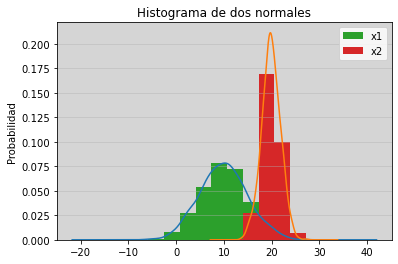

In [56]:
fig,ax = plt.subplots()
dist.plot.kde(ax=ax,legend=False,title="Histograma de dos normales")
dist.plot.hist(density = True,ax = ax)
ax.set_ylabel("Probabilidad")
ax.grid(axis="y",alpha=0.5)
ax.set_facecolor("#d5d5d5")

In [57]:
from scipy import stats

In [58]:
dist = stats.norm() # distribución normal teórica

In [59]:
sample = dist.rvs(size=1000)

In [60]:
x = np.linspace(start=stats.norm.ppf(0.01),stop=stats.norm.ppf(0.99),num=250)

In [61]:
gkde = stats.gaussian_kde(dataset=sample)

Text(-2.0, 0.35, '$f(x)=\\frac{e^{-x^2/2}}{\\sqrt{2/pi}}$')

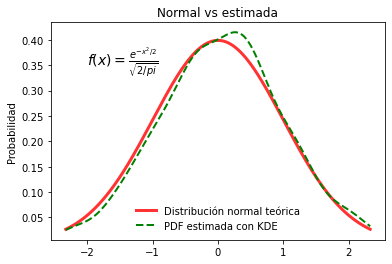

In [67]:
fig, ax = plt.subplots()
ax.plot(x,dist.pdf(x),linestyle="solid",c="red",lw=3,alpha=0.8,label="Distribución normal teórica")
ax.plot(x,gkde.evaluate(x),linestyle="dashed",c="green",lw=2,label="PDF estimada con KDE")
ax.legend(loc="best",frameon=False)
ax.set_title("Normal vs estimada")
ax.set_ylabel("Probabilidad")
ax.text(-2.,0.35,r'$f(x)=\frac{e^{-x^2/2}}{\sqrt{2/pi}}$',fontsize=14)

# Otras alternativas de histogramas (Seaborn)

In [68]:
import seaborn as sb

D:\Aplicaciones\Professional\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

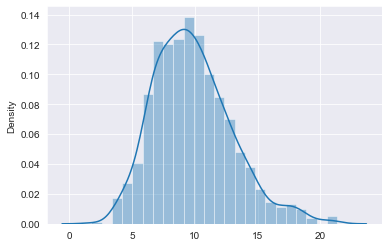

In [73]:
sb.distplot(data)

In [74]:
np.random.seed(2019)
x = np.random.laplace(loc=10,scale=3,size=1000)

D:\Aplicaciones\Professional\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

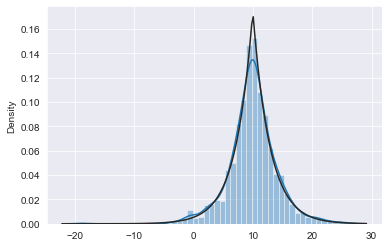

In [77]:
sb.set_style("darkgrid")
sb.distplot(x,fit=stats.laplace)

# Otras formas

In [78]:
data2 = np.random.choice(np.arange(10),size=1000,p=np.linspace(1,11,10)/60)
s = pd.Series(data2)
s.value_counts()

9    206
8    152
7    147
6    118
5     98
4     92
3     87
2     55
1     27
0     18
dtype: int64

In [79]:
s.value_counts(normalize=True)

9    0.206
8    0.152
7    0.147
6    0.118
5    0.098
4    0.092
3    0.087
2    0.055
1    0.027
0    0.018
dtype: float64

In [80]:
ages = pd.Series([1,1,3,5,6,7,8,8,9,9,10,11,12,12,13,14,16,17,18,21,22,23,26,35,38,46,50])
bins = (0,10,15,18,21,np.inf)
labels=("Inf","preAd","Ado","Univ","Adult")
groups = pd.cut(ages,bins=bins,labels=labels)

In [81]:
groups.value_counts()

Inf      11
Adult     7
preAd     5
Ado       3
Univ      1
dtype: int64

In [83]:
pd.concat((ages,groups),axis=1).rename(columns={0:'ages', 1:'group'})

,ages,group
0,1,Inf
1,1,Inf
2,3,Inf
3,5,Inf
4,6,Inf
5,7,Inf
6,8,Inf
7,8,Inf
8,9,Inf
9,9,Inf
